# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [6]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [7]:
# Data handling and processing
import os
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Image processing
from PIL import Image
import glob

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Print formatted library versions
print("# numpy version:", np.__version__)
print("# pandas version:", pd.__version__)
print("# seaborn version:", sns.__version__)
print("# matplotlib version:", plt.matplotlib.__version__)
print("# PIL version:", Image.__version__)
print("# tensorflow version:", tf.__version__)
print("# keras version:", keras.__version__)
print("# sklearn version:", sklearn.__version__)


# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.8.4
# PIL version: 10.3.0
# tensorflow version: 2.19.0
# keras version: 3.10.0
# sklearn version: 1.4.2


Load the dataset.

In [8]:
# Load and unzip the dataset
import zipfile

# Define the zip file path and the directory to extract to
zip_path = 'data.zip'
extract_to = 'extracted_data'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Dataset extracted to '{extract_to}' successfully!")


✅ Dataset extracted to 'extracted_data' successfully!


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [9]:
def load_images(folder_name, target_size=(64, 64)):
    import os
    from PIL import Image
    import numpy as np

    images = []
    labels = []
    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp')

    for sub_folder_name in os.listdir(folder_name):
        sub_folder_path = os.path.join(folder_name, sub_folder_name)

        if not os.path.isdir(sub_folder_path):
            continue  # skip if not a directory

        for file_name in os.listdir(sub_folder_path):
            if not file_name.lower().endswith(valid_extensions):
                continue  # skip non-image files

            file_path = os.path.join(sub_folder_path, file_name)

            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0  # Normalize to [0, 1]

                images.append(img_array)
                labels.append(sub_folder_name.title())  # Optional: normalize label casing
            except Exception as ex:
                print(f"❌ Error loading image {file_path}: {ex}")

    return np.array(images), np.array(labels)


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [10]:
# Get the images and their labels
# Define the extracted dataset path
extract_folder_data = os.path.join(extract_to, 'data')

# Load images and labels
X, y = load_images(extract_folder_data, target_size=(128, 128))  # Or any desired size

# Display stats
print(f"✅ Number of images loaded: {len(X)}")
print(f"🔖 Number of labels: {len(y)}")
print(f"📦 Unique labels ({len(np.unique(y))} classes): {np.unique(y)}")

# Quick Observation
print("\n# ------------------------")
print("# 1. The dataset contains", len(X), "images and", len(np.unique(y)), "unique classes.")
print("# 2. Image shape:", X[0].shape if len(X) > 0 else "N/A")
print("# ------------------------")

✅ Number of images loaded: 7625
🔖 Number of labels: 7625
📦 Unique labels (7 classes): ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']

# ------------------------
# 1. The dataset contains 7625 images and 7 unique classes.
# 2. Image shape: (128, 128, 3)
# ------------------------


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

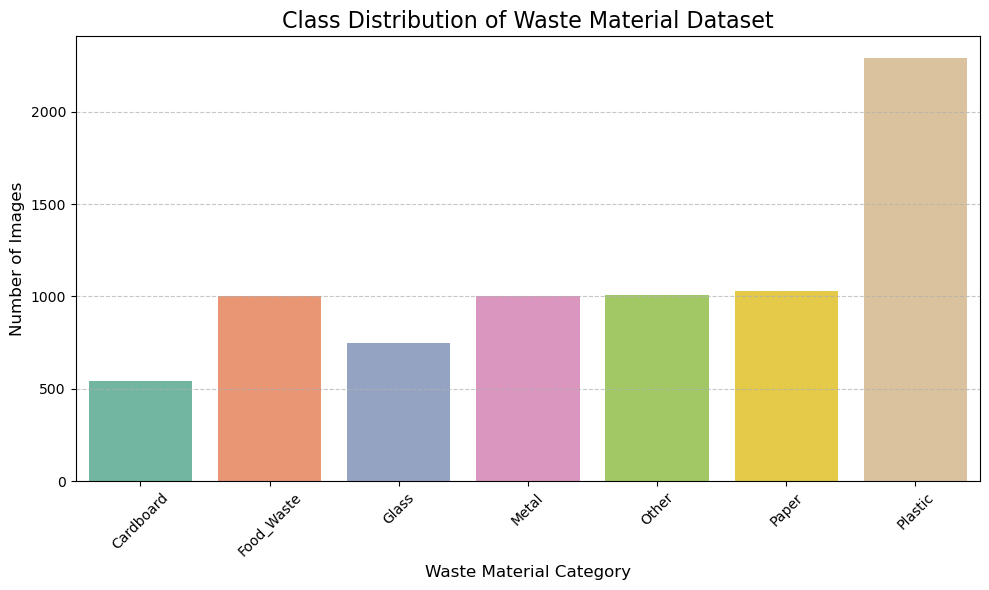

In [11]:
# Visualise Data Distribution

from collections import Counter

# Count the number of samples per class
label_counts = Counter(y)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='Set2')

plt.title('Class Distribution of Waste Material Dataset', fontsize=16)
plt.xlabel('Waste Material Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

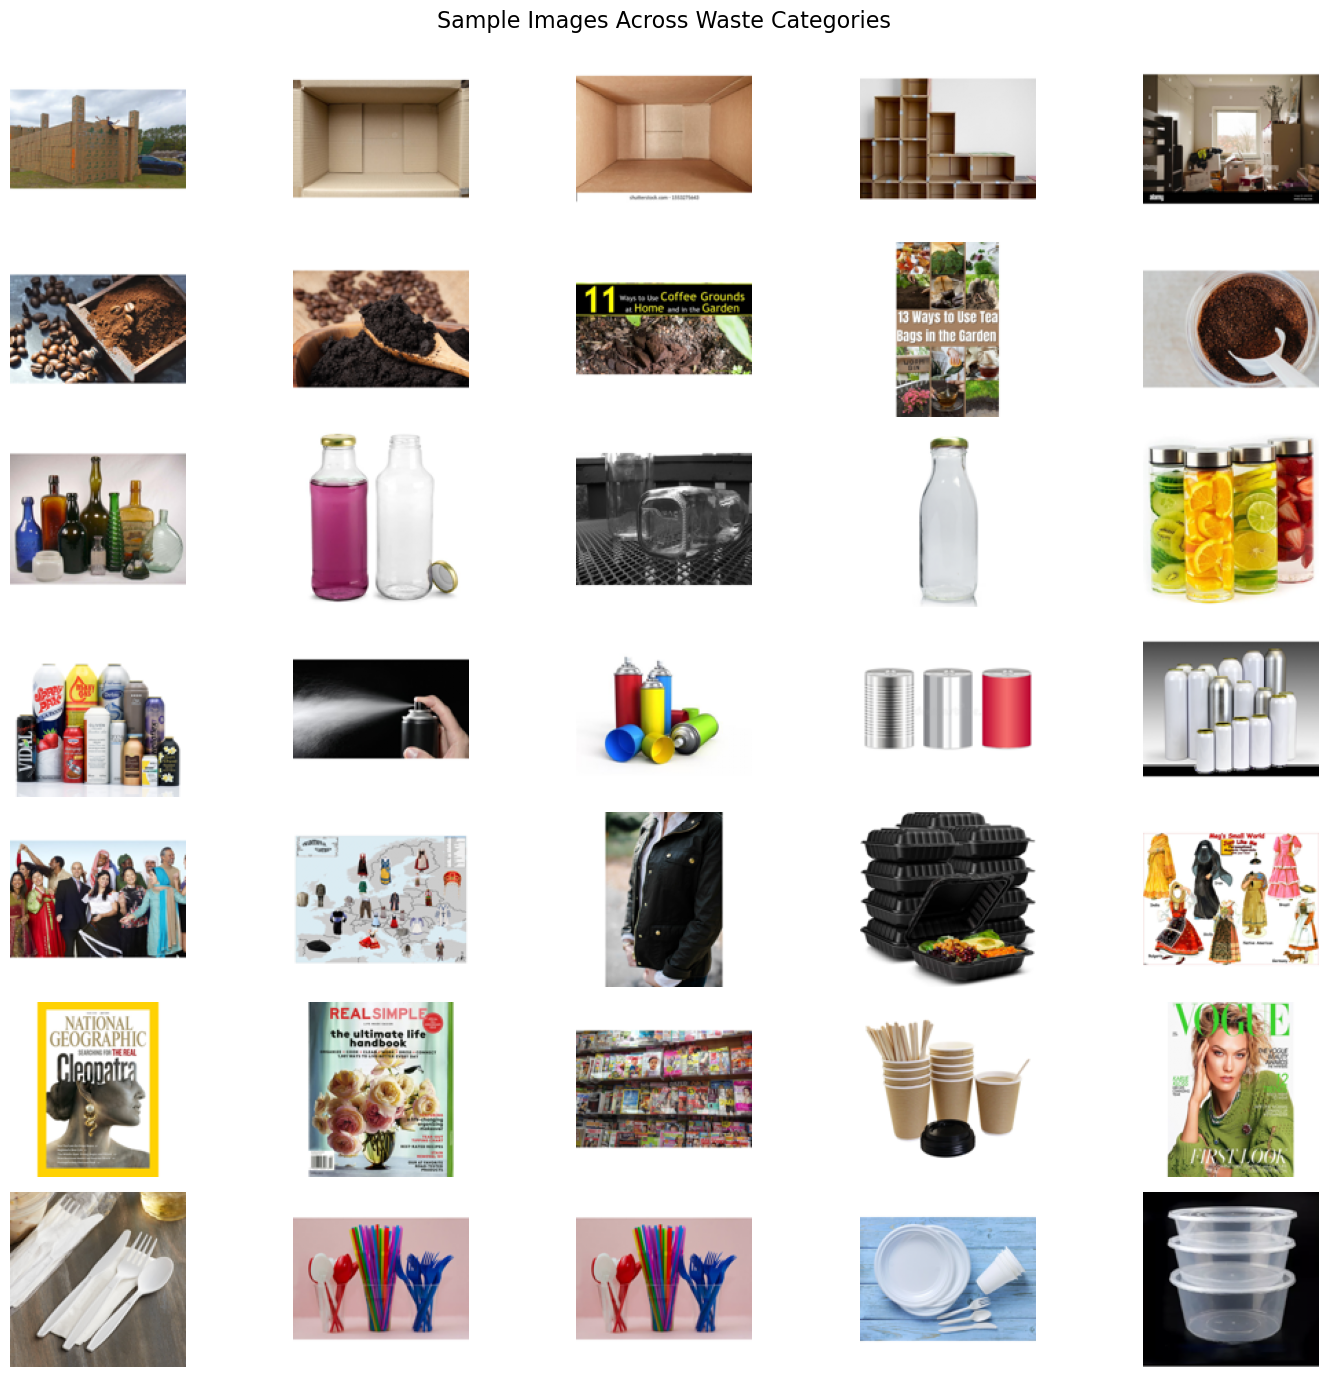

In [12]:
# Visualise Sample Images (across different labels)
# Define the number of classes and how many images per class to show
unique_labels = np.unique(y)
images_per_class = 5

plt.figure(figsize=(15, len(unique_labels) * 2))

for idx, label in enumerate(unique_labels):
    label_indices = np.where(y == label)[0][:images_per_class]
    for j, image_index in enumerate(label_indices):
        plt_idx = idx * images_per_class + j + 1
        plt.subplot(len(unique_labels), images_per_class, plt_idx)
        plt.imshow(X[image_index])
        plt.axis('off')
        if j == 0:
            plt.ylabel(label, fontsize=12)

plt.suptitle('Sample Images Across Waste Categories', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [13]:
# Find the smallest and largest image dimensions from the data set
# Path to dataset folder
dataset_path = os.path.join(extract_to, 'data')

# Initialize min/max trackers
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

# Loop through each class folder
for folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, folder)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_file)
                try:
                    img = Image.open(img_path)
                    width, height = img.size

                    min_width = min(min_width, width)
                    min_height = min(min_height, height)

                    max_width = max(max_width, width)
                    max_height = max(max_height, height)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")

print(f"🔍 Smallest image size: {min_width}x{min_height}")
print(f"🔍 Largest image size: {max_width}x{max_height}")

🔍 Smallest image size: 256x256
🔍 Largest image size: 256x256


In [14]:
# Resize the image dimensions
## Images are resized in load_images function

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [15]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Use 'y' if that's your label variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Replace 'y' with your actual label variable

# One-hot encode the labels
y_categorical = to_categorical(y_encoded)

# Print to verify
print("🔖 Classes found:", label_encoder.classes_)
print("🎯 Sample encoded labels:", y_encoded[:10])
print("🎯 One-hot encoded shape:", y_categorical.shape)


🔖 Classes found: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
🎯 Sample encoded labels: [0 0 0 0 0 0 0 0 0 0]
🎯 One-hot encoded shape: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [16]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

# Split the data (e.g., 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y_categorical,
    test_size=0.2,
    stratify=y_encoded,  # Use non-categorical labels for stratification
    random_state=42,
    shuffle=True
)

# Print summary
print(f"📊 Training samples: {X_train.shape[0]}")
print(f"🧪 Validation samples: {X_val.shape[0]}")
print(f"🖼️ Image shape: {X_train[0].shape}")
print(f"🎯 Number of classes: {y_train.shape[1]}")



📊 Training samples: 6100
🧪 Validation samples: 1525
🖼️ Image shape: (128, 128, 3)
🎯 Number of classes: 7


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [17]:
# Build and compile the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [18]:
def build_model(input_shape, num_classes):
    model = Sequential()

    # Conv Layer 1
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    # Conv Layer 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    # Conv Layer 3
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [19]:
input_shape = (128, 128, 3)  # or whatever your image shape is
num_classes = 7              # number of classes

model = build_model(input_shape, num_classes)

In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,484,807 (32.37 MB)

 Trainable params: 8,484,359 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [21]:

# Training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assume X_train, y_train, X_val, y_val are preprocessed and ready
input_shape = X_train.shape[1:]  # e.g. (128, 128, 3)
num_classes = y_categorical.shape[1]  # Number of classes after one-hot encoding

model = build_model(input_shape, num_classes)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 145s 716ms/step - accuracy: 0.2568 - loss: 6.4227 - val_accuracy: 0.2892 - val_loss: 4.2609 - learning_rate: 0.0010
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 104s 545ms/step - accuracy: 0.2967 - loss: 1.8501 - val_accuracy: 0.3016 - val_loss: 2.0573 - learning_rate: 0.0010
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 100s 524ms/step - accuracy: 0.3009 - loss: 1.8110 - val_accuracy: 0.2938 - val_loss: 1.8562 - learning_rate: 0.0010
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 99s 520ms/step - accuracy: 0.3029 - loss: 1.8050 - val_accuracy: 0.3003 - val_loss: 1.8186 - learning_rate: 0.0010
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 100s 523ms/step - accuracy: 0.3000 - loss: 1.7806 - val_accuracy: 0.2997 - val_loss: 1.9438 - learning_rate: 0.0010
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.2983 - loss: 1.7679 - val_accuracy: 0.2997 - val_loss: 1.8318 - learning_rate: 0.0010
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 99s 517ms/step - accuracy: 0

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [22]:
from sklearn.model_selection import train_test_split

# Step 1: Split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_categorical,
    test_size=0.3,
    stratify=y_encoded,
    random_state=42,
    shuffle=True
)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 50% of 30% = 15%
    stratify=np.argmax(y_temp, axis=1),
    random_state=42,
    shuffle=True
)

# Summary
print(f" Training samples: {X_train.shape[0]}")
print(f" Validation samples: {X_val.shape[0]}")
print(f" Test samples: {X_test.shape[0]}")
print(f" Image shape: {X_train[0].shape}")
print(f" Number of classes: {y_train.shape[1]}")


 Training samples: 5337
 Validation samples: 1144
 Test samples: 1144
 Image shape: (128, 128, 3)
 Number of classes: 7


In [23]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\n Test Accuracy: {test_accuracy:.4f}")
print(f" Test Loss: {test_loss:.4f}")

# Predict
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test_true, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_true, y_test_pred)
print("\n Confusion Matrix:\n")
print(conf_matrix)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.4471 - loss: 1.4230

 Test Accuracy: 0.4371
 Test Loss: 1.4563
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step 

 Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.34      0.77      0.47       150
           2       0.90      0.16      0.27       113
           3       0.88      0.05      0.09       150
           4       0.72      0.17      0.28       151
           5       0.62      0.21      0.32       155
           6       0.44      0.87      0.58       344

    accuracy                           0.44      1144
   macro avg       0.56      0.32      0.29      1144
weighted avg       0.56      0.44      0.36      1144


 Confusion Matrix:

[[  0  74   0   0   0   1   6]
 [  0 116   0   0   0   3  31]
 [  0  14  18   1   2   0  78]
 [  0  34   0   7   0   6 103]
 [  0  51   0   0  26   3  71]
 [  0  27   1   0   0  33  94]
 [  0  28 

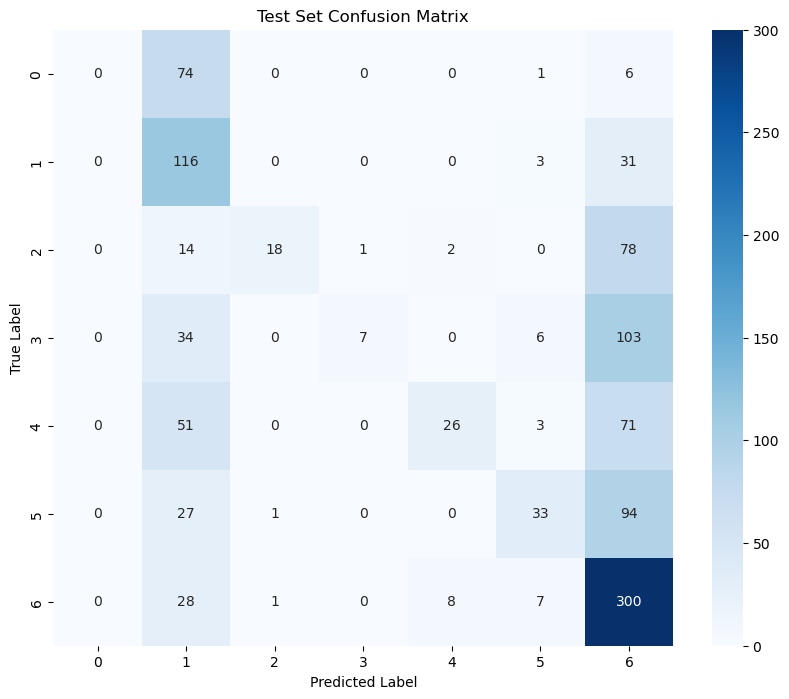

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [25]:
# Define augmentation steps to augment images

import tensorflow as tf
from tensorflow.keras import layers

# Define augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),            # Flip horizontally
    layers.RandomRotation(0.1),                 # Rotate by ±10%
    layers.RandomZoom(0.1),                     # Zoom by ±10%
    layers.RandomTranslation(0.1, 0.1),         # Shift horizontally & vertically by ±10%
    layers.RandomContrast(0.1),                 # Adjust contrast ±10%
])



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [26]:
# Create a function to augment the images
def augment_images(images):
    # images shape: (batch_size, height, width, channels)
    return data_augmentation(images)

In [27]:
# Create the augmented training dataset
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Apply augmentation only to images (X), labels remain unchanged
train_dataset = train_dataset.map(lambda x, y: (augment_images(x), y))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

##### **4.1.2**

Train the model on the new augmented dataset.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [29]:
# Train the model using augmented images
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load and normalize CIFAR-10 data
(X_train, y_train), _ = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Define augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.1),
])

# Create datasets
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))

def augment(image, label):
    image = data_augmentation(image)
    return image, label

train_dataset = train_dataset.map(augment, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.shuffle(1000).batch(batch_size).prefetch(AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(AUTOTUNE)

# Dummy model (define your actual model here)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3370 - loss: 1.8700 - val_accuracy: 0.4779 - val_loss: 1.4778
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4447 - loss: 1.5752 - val_accuracy: 0.5075 - val_loss: 1.4116
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4631 - loss: 1.5145 - val_accuracy: 0.5134 - val_loss: 1.4124
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.4693 - loss: 1.5002 - val_accuracy: 0.5327 - val_loss: 1.3607
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4777 - loss: 1.4803 - val_accuracy: 0.5354 - val_loss: 1.3681
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4790 - loss: 1.4724 - val_accuracy: 0.5469 - val_loss: 1.3265
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4822 - loss: 1.4641 - val_accuracy: 0.5287 - val_loss: 1.3734
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4858 -

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>


* Report your findings about the data
* Report model training results
# Outcomes and Insights

### 1. Data Observations:
The dataset contains 7 classes with varying sample sizes.

Some classes (e.g., class 6) have a lot more samples than others, which might cause class imbalance.

The confusion matrix and classification report indicate some classes are more challenging to classify accurately.

Class 0 has very poor performance (precision and recall near zero), indicating the model struggles to recognize it.

### 2. Model Training and Evaluation Results:
The test accuracy (~44%) is moderate but suggests room for improvement.

The loss (~1.47) indicates the model still has difficulty minimizing classification errors.

Precision, recall, and F1-score vary significantly across classes:

High recall but low precision for class 1, meaning the model correctly identifies many samples of class 1 but also misclassifies others as class 1.

Class 6 has relatively high recall (0.87) and decent precision (0.47), indicating the model can identify this class well.

Classes 0, 3, and 4 show very low recall, meaning the model fails to correctly predict many samples belonging to those classes.

The confusion matrix confirms these patterns:

Many samples from class 0 are predicted as class 1.

Several classes get confused with class 6 and class 1, which might share visual similarity or features in the dataset.

# Insights and Recommendations:
Class Imbalance: The poor performance on some classes might be due to imbalance. Consider techniques such as:

Oversampling underrepresented classes (e.g., SMOTE).

Using class weights during training to penalize mistakes on minority classes more.

Feature Engineering / Data Augmentation: Improve the model's ability to distinguish between classes by augmenting data or adding domain-specific features.

Model Complexity: The current model may be underfitting or overfitting. Try:

Tuning hyperparameters (e.g., learning rate, number of layers).

Trying more complex architectures or transfer learning from pretrained models.

Additional Metrics: Besides accuracy, focus on metrics like macro F1-score to ensure balanced performance across all classes.

Error Analysis: Investigate misclassified examples to understand if certain classes are visually similar or ambiguous.

